In [12]:
import pandas as pd
import numpy as np
import re
import string
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch 
from keras.utils.np_utils import to_categorical

In [16]:
data_train = torch.load('Data_GAN/tensor_train.pt')
X_train = data_train[:, :40]
y_train = data_train[:, 40]
X_train = X_train.detach().numpy()
y_train = y_train.detach().numpy()

data_test = torch.load('Data_GAN/tensor_test.pt')
X_test = data_test[:, :40]
y_test = data_test[:, 40]
X_test = X_test.detach().numpy()
y_test = y_test.detach().numpy()

y_train = y_train.astype(int)
y_test = y_test.astype(int)

y_train = np.eye(7)[y_train-1]
y_test = np.eye(7)[y_test-1]

(11819, 7)

In [19]:
rlist =['000 - Normal', '126 - Path Traversal',
       '153 - Input Data Manipulation', '194 - Fake the Source of Data',
       '242 - Code Injection', '310 - Scanning for Vulnerable Software',
       '34 - HTTP Response Splitting']

In [18]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=40))
model.add(GRU(units=32))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Đánh giá mô hình
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred, target_names=rlist, labels= range(7)))

Epoch 1/5
10120/10120 [==============================] - 110s 11ms/step - loss: 1.0366 - accuracy: 0.5672 - val_loss: 1.7444 - val_accuracy: 0.0000e+00
Epoch 2/5
10120/10120 [==============================] - 110s 11ms/step - loss: 1.0229 - accuracy: 0.5722 - val_loss: 1.7849 - val_accuracy: 0.0000e+00
Epoch 3/5
10120/10120 [==============================] - 110s 11ms/step - loss: 1.0209 - accuracy: 0.5725 - val_loss: 1.7415 - val_accuracy: 0.0000e+00
Epoch 4/5
10120/10120 [==============================] - 109s 11ms/step - loss: 1.0194 - accuracy: 0.5727 - val_loss: 1.7561 - val_accuracy: 0.0000e+00
Epoch 5/5
370/370 [==============================] - 1s 2ms/step


NameError: name 'rlist' is not defined

In [20]:
print(classification_report(y_test, y_pred, target_names=rlist, labels= range(7)))

                                        precision    recall  f1-score   support

                          000 - Normal       0.00      0.00      0.00         0
                  126 - Path Traversal       0.00      0.00      0.00       167
         153 - Input Data Manipulation       0.00      0.00      0.00      1950
         194 - Fake the Source of Data       0.00      0.00      0.00         0
                  242 - Code Injection       0.00      0.00      0.00      9168
310 - Scanning for Vulnerable Software       0.00      0.00      0.00         0
          34 - HTTP Response Splitting       0.00      0.00      0.00       534

                             micro avg       0.00      0.00      0.00     11819
                             macro avg       0.00      0.00      0.00     11819
                          weighted avg       0.00      0.00      0.00     11819
                           samples avg       0.00      0.00      0.00     11819



c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

In [21]:
y_predict = np.argmax(y_pred , axis=1)
y_test_pre = np.argmax(y_test, axis=1)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pre, y_predict)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

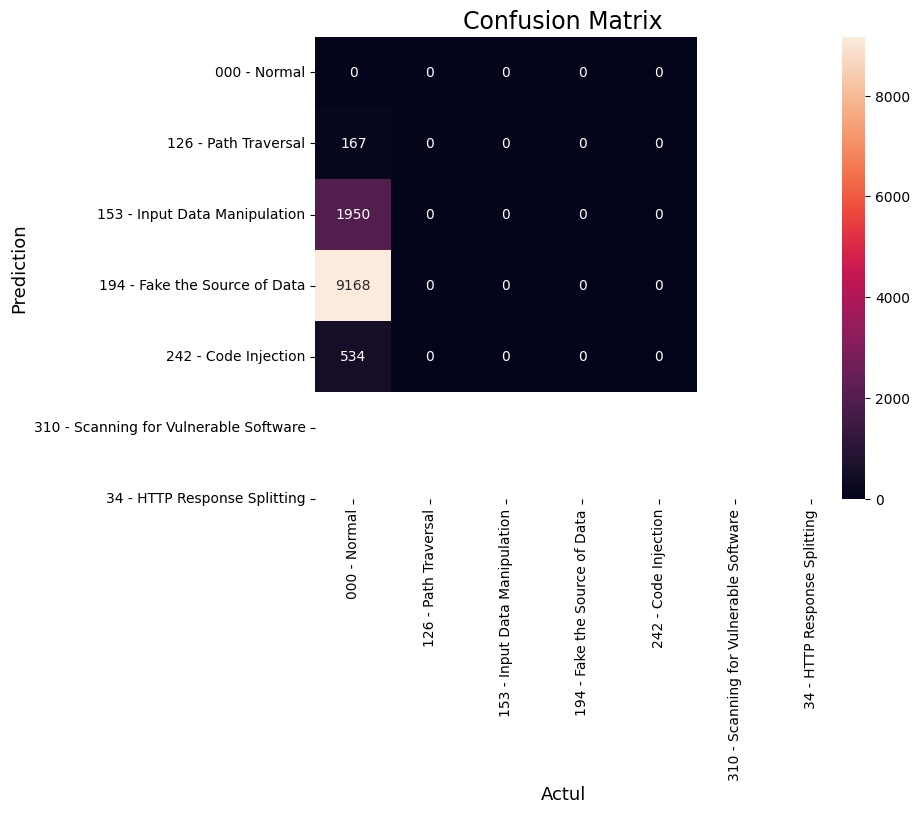

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='g',xticklabels = rlist,yticklabels= rlist)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actul',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()